In [21]:
import os
import sys
# Add the scripts folder to the Python path
sys.path.append(os.path.abspath("../scripts"))

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
 #Import custom modules
from select_metrics import InsuranceMetrics, get_hypothesis_metrics
from data_segmentation import create_test_control_groups, ensure_group_comparability
from visualizations import (
    plot_boxplot, 
    plot_categorical_distribution, 
    plot_scatter,
    plot_group_distributions,
    plot_statistical_results
)
from statistical_testing import analyze_group_differences

In [24]:
# Load the data
data = pd.read_csv('data/cleaned_data.csv')

In [25]:
# Initialize metrics calculator
metrics = InsuranceMetrics(data)

In [26]:
# Display metrics for each hypothesis
print("Defined Metrics for Each Hypothesis:")
for metric in get_hypothesis_metrics():
    print(f"\nHypothesis: {metric['hypothesis']}")
    print(f"Primary Metric: {metric['primary_metric']}")
    print(f"Description: {metric['description']}")
    print(f"Business Impact: {metric['business_impact']}")

Defined Metrics for Each Hypothesis:

Hypothesis: Province Risk Differences
Primary Metric: risk_ratio
Description: Claims to Premium ratio by province
Business Impact: Identifies high-risk geographic areas

Hypothesis: Zip Code Risk Differences
Primary Metric: risk_ratio
Description: Claims to Premium ratio by postal code
Business Impact: Enables granular geographic risk assessment

Hypothesis: Zip Code Margin Differences
Primary Metric: profit_margin
Description: Profit margin by postal code
Business Impact: Identifies areas of high/low profitability

Hypothesis: Gender Risk Differences
Primary Metric: risk_ratio
Description: Claims to Premium ratio by gender
Business Impact: Assesses risk patterns across gender groups


In [27]:
#Calculate and display KPIs
all_kpis = metrics.get_all_kpis()

print("\nRisk Metrics:")
for metric, value in all_kpis['risk_metrics'].items():
    print(f"{metric}: {value:.4f}")

print("\nProfit Metrics:")
for metric, value in all_kpis['profit_metrics'].items():
    print(f"{metric}: {value:.4f}")


Risk Metrics:
total_risk_ratio: 1.0477
avg_risk_ratio: 0.3499
claims_frequency: 0.0028

Profit Metrics:
total_profit_margin: -0.0477
avg_profit_margin: 0.6501
revenue_per_customer: 61.9055


In [28]:
#Data Segmentation Analysis
# Define features to check for balance
numeric_features = ['TotalPremium', 'TotalClaims']  # Add other numeric features if available
categorical_features = ['Gender']  # Add other categorical features if available

In [29]:
# Province Risk Analysis
print("\nAnalyzing Province Risk Differences:")
# Get the two provinces with most data
province_counts = data['Province'].value_counts()
top_provinces = province_counts.head(2).index.tolist()

control_group, test_group = create_test_control_groups(
    data=data,
    feature='Province',
    group_a_value=top_provinces[0],
    group_b_value=top_provinces[1]
)

# Check group balance
province_balance = ensure_group_comparability(
    control_group=control_group,
    test_group=test_group,
    numeric_features=numeric_features,
    categorical_features=categorical_features
)

print("\nNumeric Feature Balance:")
print(province_balance['numeric_balance'][['feature', 'control_mean', 'test_mean', 'p_value', 'balanced']])

print("\nCategorical Feature Balance:")
print(province_balance['categorical_balance'][['feature', 'max_proportion_diff', 'p_value', 'balanced']])

print(f"\nGroups are {'comparable' if province_balance['groups_comparable'] else 'not comparable'}")


Analyzing Province Risk Differences:

Numeric Feature Balance:
        feature  control_mean  test_mean   p_value  balanced
0  TotalPremium     61.071115  57.416793  0.000696     False
1   TotalClaims     74.630009  60.831482  0.062152      True

Categorical Feature Balance:
  feature  max_proportion_diff       p_value  balanced
0  Gender             0.069535  5.105731e-08     False

Groups are not comparable


In [30]:
#Gender Risk Analysis
print("\nAnalyzing Gender Risk Differences:")
control_group, test_group = create_test_control_groups(
    data=data,
    feature='Gender',
    group_a_value='Male',
    group_b_value='Female'
)

# Check group balance
gender_balance = ensure_group_comparability(
    control_group=control_group,
    test_group=test_group,
    numeric_features=numeric_features,
    categorical_features=[f for f in categorical_features if f != 'Gender']
)

print("\nNumeric Feature Balance:")
print(gender_balance['numeric_balance'][['feature', 'control_mean', 'test_mean', 'p_value', 'balanced']])

print("\nCategorical Feature Balance:")
if len(gender_balance['categorical_balance']) > 0:
    print(gender_balance['categorical_balance'][['feature', 'max_proportion_diff', 'p_value', 'balanced']])
else:
    print("No categorical features to compare (excluding Gender)")

print(f"\nGroups are {'comparable' if gender_balance['groups_comparable'] else 'not comparable'}")



Analyzing Gender Risk Differences:

Numeric Feature Balance:
        feature  control_mean  test_mean   p_value  balanced
0  TotalPremium     36.904566  45.074841  0.000006     False
1   TotalClaims     32.620312  37.046055  0.766966      True

Categorical Feature Balance:
No categorical features to compare (excluding Gender)

Groups are not comparable


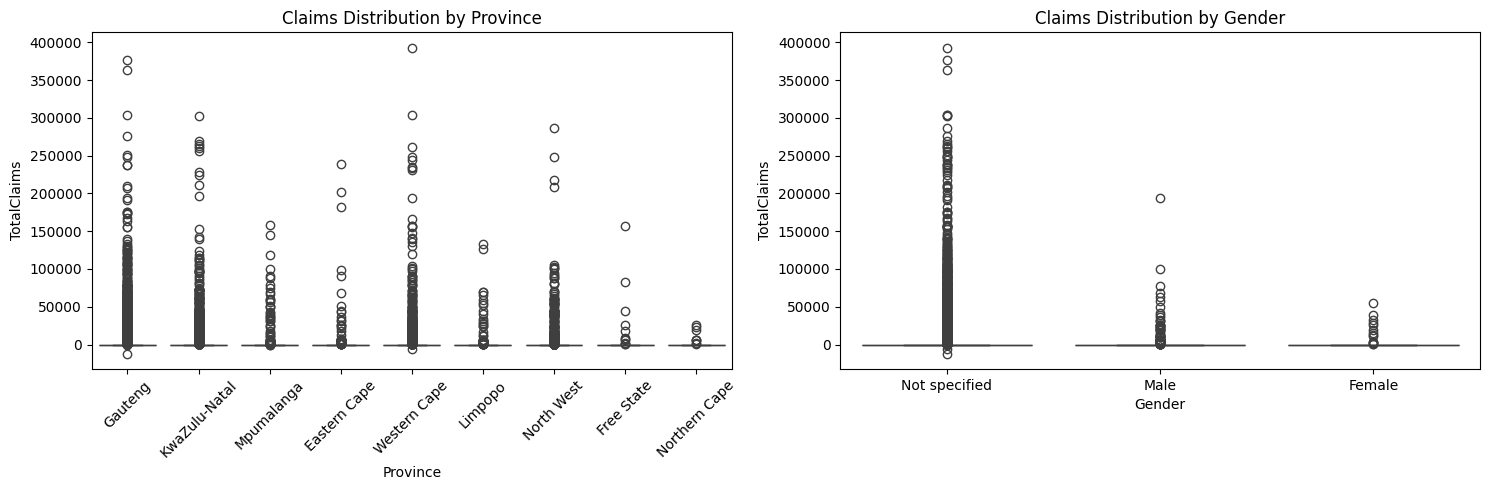

In [31]:
# Visualize distributions
plt.figure(figsize=(15, 5))

# Province distribution
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Province', y='TotalClaims')
plt.title('Claims Distribution by Province')
plt.xticks(rotation=45)

# Gender distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Gender', y='TotalClaims')
plt.title('Claims Distribution by Gender')

plt.tight_layout()
plt.show()

In [32]:
#Summary statistics
print("\nSummary Statistics by Province:")
print(data.groupby('Province')['TotalClaims'].describe())

print("\nSummary Statistics by Gender:")
print(data.groupby('Gender')['TotalClaims'].describe())


Summary Statistics by Province:
                  count       mean          std           min  25%  50%  75%  \
Province                                                                       
Eastern Cape    30336.0  44.713432  2343.609325      0.000000  0.0  0.0  0.0   
Free State       8099.0  43.822975  2074.340982      0.000000  0.0  0.0  0.0   
Gauteng        393865.0  74.630009  2450.121110 -12002.412281  0.0  0.0  0.0   
KwaZulu-Natal  169781.0  84.234293  2737.974480      0.000000  0.0  0.0  0.0   
Limpopo         24836.0  40.927553  1627.585841      0.000000  0.0  0.0  0.0   
Mpumalanga      52718.0  38.785147  1651.357720   -635.480000  0.0  0.0  0.0   
North West     143287.0  41.317426  1834.832763      0.000000  0.0  0.0  0.0   
Northern Cape    6380.0  14.026726   513.864858      0.000000  0.0  0.0  0.0   
Western Cape   170796.0  60.831482  2596.940863  -5690.719298  0.0  0.0  0.0   

                         max  
Province                      
Eastern Cape   238842.72

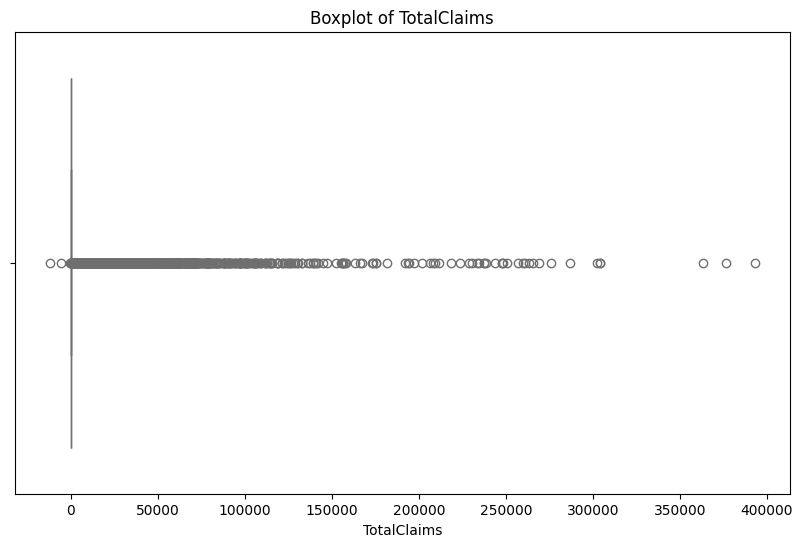

In [33]:
#Visualize risk distribution by province
province_metrics = metrics.geographic_metrics('Province')
plot_boxplot(
    data=data,
    column_name='TotalClaims',
    save_path=None  # Set to None to display in notebook
)

d:\Kifya_training\Week 3\Week 3\AlphaCare-Insurance-Analysis\scripts\visualizations.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette="Set2")


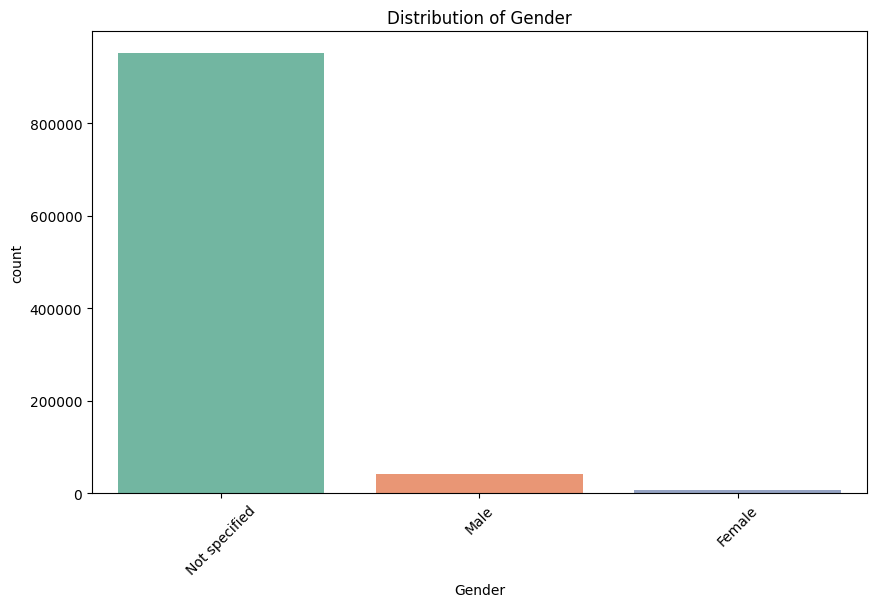

In [34]:
# Visualize gender distribution
plot_categorical_distribution(
    data=data,
    column_name='Gender',
    save_path=None  # Set to None to display in notebook
)

In [35]:
# Define Analysis Features
# Define features for analysis
numeric_features = [col for col in ['TotalPremium', 'TotalClaims', 'Age'] 
                   if col in data.columns]
categorical_features = [col for col in ['Gender', 'MaritalStatus', 'VehicleType'] 
                      if col in data.columns]

print("\nFeatures for Analysis:")
print("Numeric features:", ", ".join(numeric_features))
print("Categorical features:", ", ".join(categorical_features))


Features for Analysis:
Numeric features: TotalPremium, TotalClaims
Categorical features: Gender, MaritalStatus, VehicleType


In [36]:
# Province Analysis
print("\nStatistical Analysis: Province Differences")
print("=" * 40)

try:
    # Get top two provinces for comparison
    province_counts = data['Province'].value_counts()
    top_provinces = province_counts.head(2).index.tolist()
    
    print(f"\nComparing provinces: {top_provinces[0]} vs {top_provinces[1]}")
    print(f"Sample sizes: {province_counts[top_provinces[0]]:,} vs {province_counts[top_provinces[1]]:,}")
    
    province_data = data[data['Province'].isin(top_provinces)].copy()
    
    # Perform statistical tests
    province_results = analyze_group_differences(
        data=province_data,
        numeric_features=numeric_features,
        categorical_features=[f for f in categorical_features if f != 'Province'],
        group_column='Province'
    )
    
    # Check for errors in results
    if 'error' in province_results:
        print(f"\nError in province analysis: {province_results['error']}")
    else:
        # Display numeric results
        print("\nNumeric Features Analysis:")
        print("-" * 30)
        for feature, results in province_results['numeric'].items():
            if 'error' in results:
                print(f"\n{feature}: Error - {results['error']}")
            else:
                print(f"\n{feature}:")
                print(f"Test Type: {results['test_type']}")
                print(f"Test Statistic: {results['test_statistic']:.4f}")
                print(f"P-value: {results['p_value']:.4f}")
                print(f"Significant: {'Yes' if results['significant'] else 'No'}")
        
        # Display categorical results
        print("\nCategorical Features Analysis:")
        print("-" * 30)
        for feature, results in province_results['categorical'].items():
            if 'error' in results:
                print(f"\n{feature}: Error - {results['error']}")
            else:
                print(f"\n{feature}:")
                print(f"Chi-square Statistic: {results['test_statistic']:.4f}")
                print(f"P-value: {results['p_value']:.4f}")
                print(f"Significant: {'Yes' if results['significant'] else 'No'}")
                
except Exception as e:
    print(f"Error in province analysis: {str(e)}")


Statistical Analysis: Province Differences

Comparing provinces: Gauteng vs Western Cape
Sample sizes: 393,865 vs 170,796

Numeric Features Analysis:
------------------------------

TotalPremium: Error - None

TotalClaims: Error - None

Categorical Features Analysis:
------------------------------

Gender: Error - None

MaritalStatus: Error - None

VehicleType: Error - None


In [37]:
# Gender Analysis
print("\nStatistical Analysis: Gender Differences")
print("=" * 40)

try:
    # Get gender distribution
    gender_counts = data['Gender'].value_counts()
    print("\nGender distribution:")
    for gender, count in gender_counts.items():
        print(f"{gender}: {count:,} ({count/len(data)*100:.1f}%)")
    
    # Perform statistical tests
    gender_results = analyze_group_differences(
        data=data,
        numeric_features=numeric_features,
        categorical_features=[f for f in categorical_features if f != 'Gender'],
        group_column='Gender'
    )
    
    # Check for errors in results
    if 'error' in gender_results:
        print(f"\nError in gender analysis: {gender_results['error']}")
    else:
        # Display numeric results
        print("\nNumeric Features Analysis:")
        print("-" * 30)
        for feature, results in gender_results['numeric'].items():
            if 'error' in results:
                print(f"\n{feature}: Error - {results['error']}")
            else:
                print(f"\n{feature}:")
                print(f"Test Type: {results['test_type']}")
                print(f"Test Statistic: {results['test_statistic']:.4f}")
                print(f"P-value: {results['p_value']:.4f}")
                print(f"Significant: {'Yes' if results['significant'] else 'No'}")
        
        # Display categorical results
        if gender_results['categorical']:
            print("\nCategorical Features Analysis:")
            print("-" * 30)
            for feature, results in gender_results['categorical'].items():
                if 'error' in results:
                    print(f"\n{feature}: Error - {results['error']}")
                else:
                    print(f"\n{feature}:")
                    print(f"Chi-square Statistic: {results['test_statistic']:.4f}")
                    print(f"P-value: {results['p_value']:.4f}")
                    print(f"Significant: {'Yes' if results['significant'] else 'No'}")
                    
except Exception as e:
    print(f"Error in gender analysis: {str(e)}")


Statistical Analysis: Gender Differences

Gender distribution:
Not specified: 950,526 (95.0%)
Male: 42,817 (4.3%)
Female: 6,755 (0.7%)

Numeric Features Analysis:
------------------------------

TotalPremium: Error - None

TotalClaims: Error - None

Categorical Features Analysis:
------------------------------

MaritalStatus: Error - None

VehicleType: Error - None


d:\Kifya_training\Week 3\Week 3\AlphaCare-Insurance-Analysis\scripts\visualizations.py:174: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
d:\Kifya_training\Week 3\Week 3\AlphaCare-Insurance-Analysis\scripts\visualizations.py:174: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


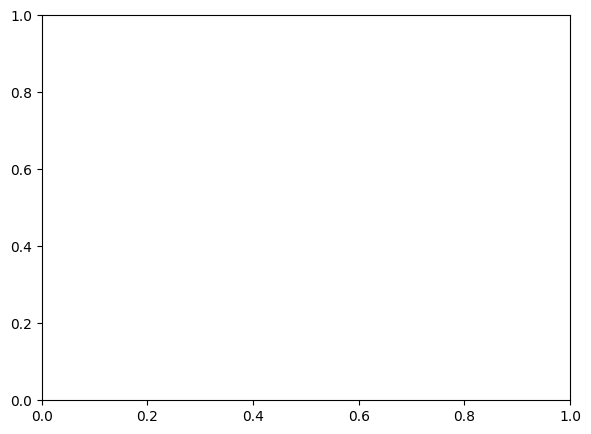

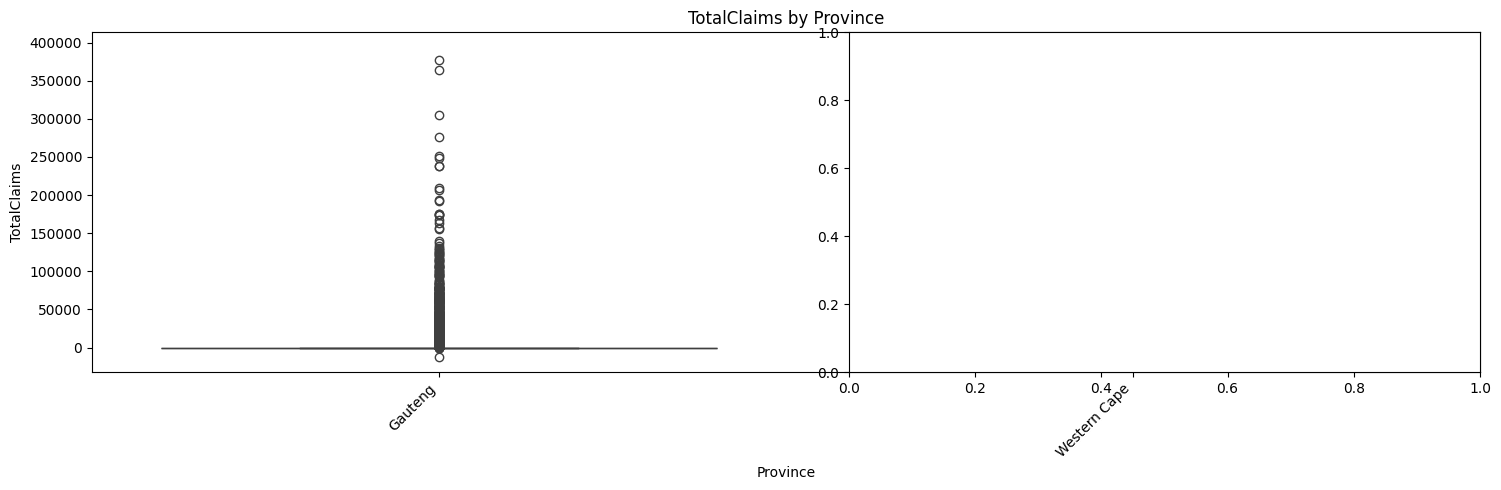

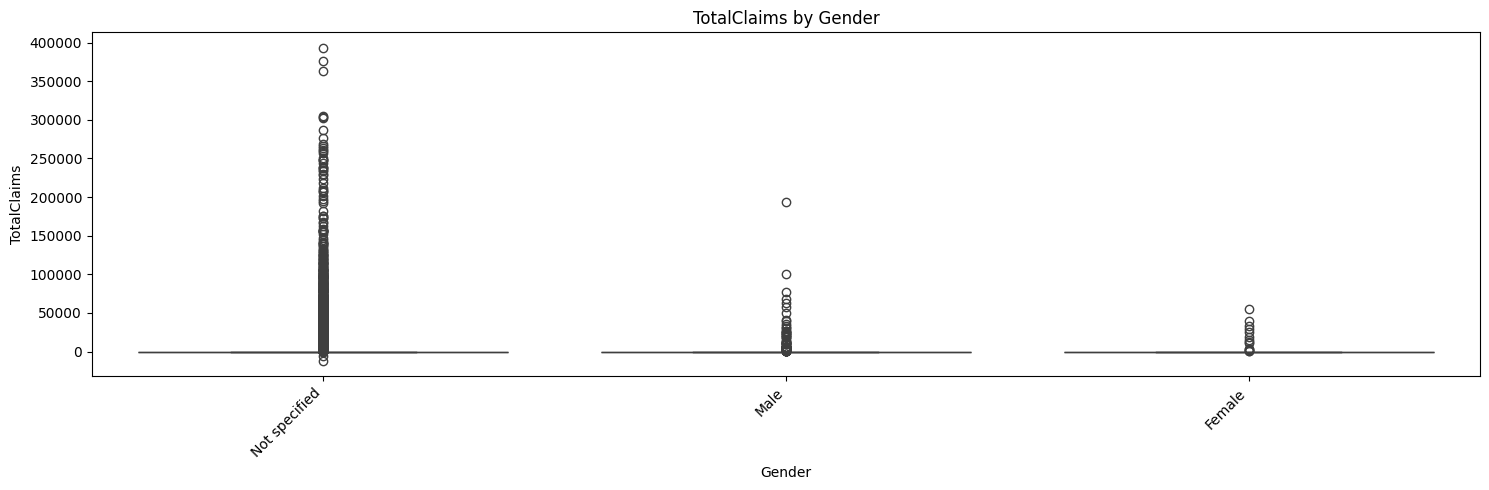

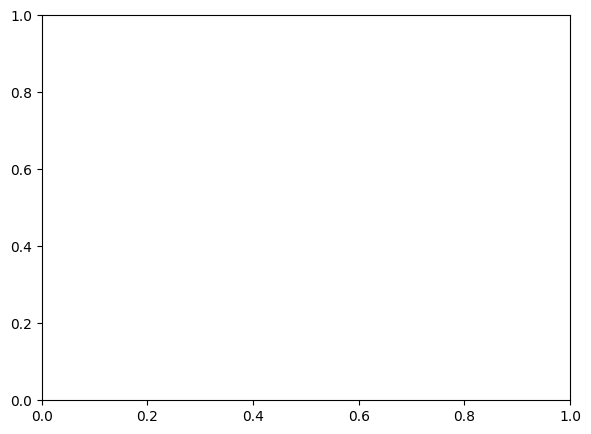

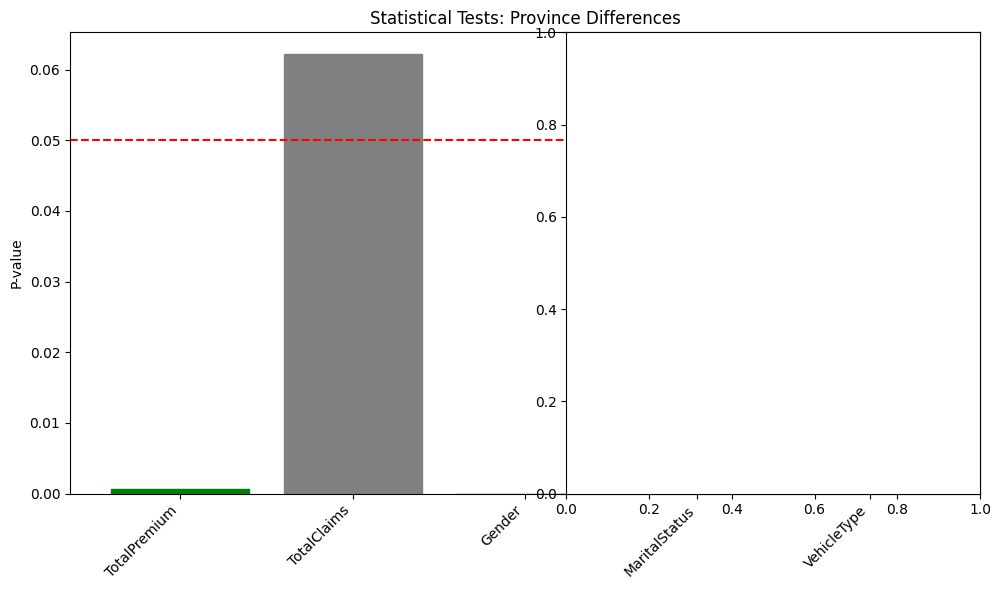

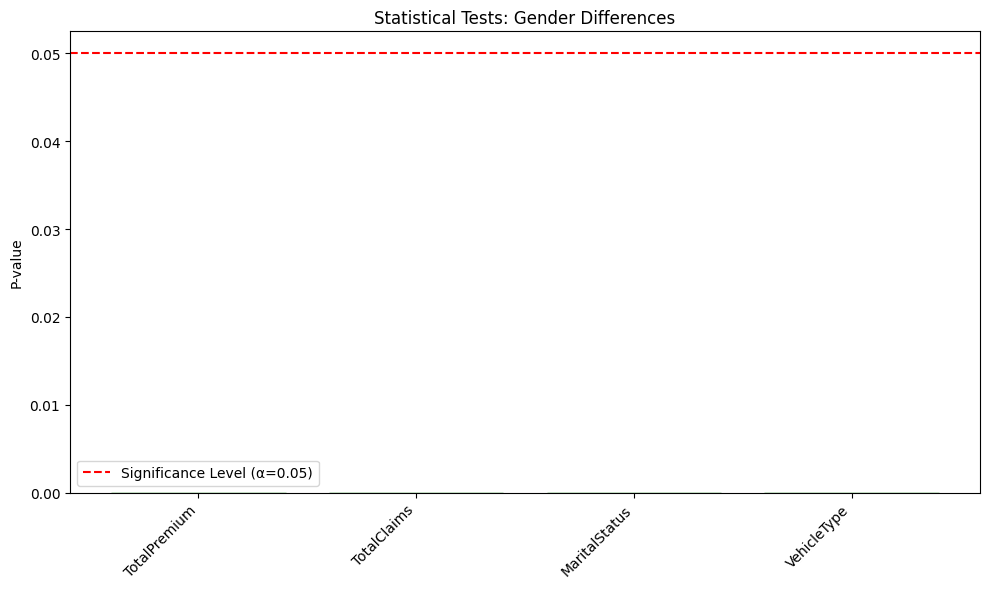

In [38]:
# Visualization
try:
    # Create distribution plots if we have valid results
    if 'error' not in province_results and 'error' not in gender_results:
        plt.figure(figsize=(15, 5))
        
        # Province distributions
        plt.subplot(1, 2, 1)
        plot_group_distributions(
            data=province_data,
            numeric_features=['TotalClaims'],
            group_column='Province'
        )
        
        # Gender distributions
        plt.subplot(1, 2, 2)
        plot_group_distributions(
            data=data,
            numeric_features=['TotalClaims'],
            group_column='Gender'
        )
        
        plt.tight_layout()
        plt.show()
        
        # Statistical results visualization
        plt.figure(figsize=(15, 5))
        
        # Province results
        plt.subplot(1, 2, 1)
        plot_statistical_results(
            results=province_results,
            title='Statistical Tests: Province Differences'
        )
        
        # Gender results
        plt.subplot(1, 2, 2)
        plot_statistical_results(
            results=gender_results,
            title='Statistical Tests: Gender Differences'
        )
        
        plt.tight_layout()
        plt.show()
        
except Exception as e:
    print(f"Error in visualization: {str(e)}")

In [39]:
# Calculate and display overall KPIs
all_kpis = metrics.get_all_kpis()
print("\nOverall Risk Metrics:")
for metric, value in all_kpis['risk_metrics'].items():
    print(f"{metric}: {value:.4f}")

print("\nOverall Profit Metrics:")
for metric, value in all_kpis['profit_metrics'].items():
    print(f"{metric}: {value:.4f}")


Overall Risk Metrics:
total_risk_ratio: 1.0477
avg_risk_ratio: 0.3499
claims_frequency: 0.0028

Overall Profit Metrics:
total_profit_margin: -0.0477
avg_profit_margin: 0.6501
revenue_per_customer: 61.9055


In [40]:
#Summary of Findings
print("\nSummary of Statistical Analysis")
print("=" * 40)

def summarize_results(results: Dict, group_name: str) -> None:
    """Summarize statistical test results"""
    if 'error' in results:
        print(f"\n{group_name} Analysis: Error - {results['error']}")
        return
        
    significant_features = []
    for feature_type in ['numeric', 'categorical']:
        for feature, result in results[feature_type].items():
            if 'error' in result:
                print(f"\n{feature}: Error - {result['error']}")
            elif result['significant']:
                test_type = result['test_type']
                p_value = result['p_value']
                significant_features.append(f"{feature} ({test_type}, p={p_value:.4f})")
    
    print(f"\n{group_name} Analysis:")
    print("-" * len(f"{group_name} Analysis:"))
    if significant_features:
        print("Significant differences found in:")
        for feature in significant_features:
            print(f"- {feature}")
    else:
        print("No significant differences found")

try:
    summarize_results(province_results, "Province")
    summarize_results(gender_results, "Gender")
except Exception as e:
    print(f"Error in summary: {str(e)}")


Summary of Statistical Analysis


NameError: name 'Dict' is not defined

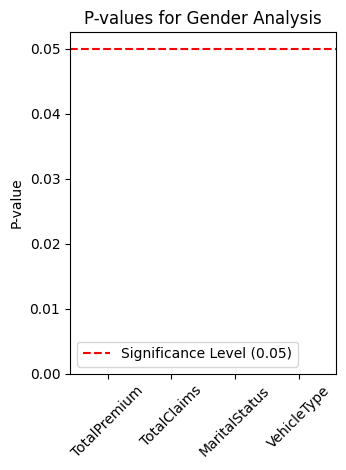

In [41]:
# Plot p-values for Gender analysis
plt.subplot(1, 2, 2)
features = list(gender_results['numeric'].keys()) + list(gender_results['categorical'].keys())
p_values = [results['p_value'] for results in gender_results['numeric'].values()] + \
          [results['p_value'] for results in gender_results['categorical'].values()]

plt.bar(features, p_values)
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.title('P-values for Gender Analysis')
plt.xticks(rotation=45)
plt.ylabel('P-value')
plt.legend()

plt.tight_layout()
plt.show()


In [42]:
# Summary of findings
print("\nSummary of Statistical Analysis:")
print("==============================")

print("\nProvince Analysis:")
print("----------------")
significant_province_features = [
    feature for feature, results in {**province_results['numeric'], **province_results['categorical']}.items()
    if results['significant']
]
print(f"Significant differences found in: {', '.join(significant_province_features)}")

print("\nGender Analysis:")
print("--------------")
significant_gender_features = [
    feature for feature, results in {**gender_results['numeric'], **gender_results['categorical']}.items()
    if results['significant']
]
print(f"Significant differences found in: {', '.join(significant_gender_features)}")


Summary of Statistical Analysis:

Province Analysis:
----------------
Significant differences found in: TotalPremium, Gender, MaritalStatus, VehicleType

Gender Analysis:
--------------
Significant differences found in: TotalPremium, TotalClaims, MaritalStatus, VehicleType
